# 대회 소개 

## File descriptions
#### train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 
#### 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.
#### test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.
#### sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.

## Data fields
#### ID : 집을 구분하는 번호
#### date : 집을 구매한 날짜
#### price : 집의 가격(Target variable)
#### bedrooms : 침실의 수
#### bathrooms : 화장실의 수
#### sqft_living : 주거 공간의 평방 피트(면적)
#### sqft_lot : 부지의 평방 피트(면적)
#### floors : 집의 층 수
#### waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
#### view : 집이 얼마나 좋아 보이는지의 정도
#### condition : 집의 전반적인 상태
#### grade : King County grading 시스템 기준으로 매긴 집의 등급
#### sqft_above : 지하실을 제외한 평방 피트(면적)
#### sqft_basement : 지하실의 평방 피트(면적)
#### yr_built : 지어진 년도
#### yr_renovated : 집을 재건축한 년도
#### zipcode : 우편번호
#### lat : 위도
#### long : 경도
#### sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
#### sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

### 데이터에 대한 전처리를 train, test.csv 모두 동일하게 진행한 후 가장 주택가격을 잘 예측할 수 있는 모델을 선정하여

### test.csv의 특성들을 가지고 price를 예측한 후 submission 파일 형식에 맞게 작성합니다. 제한시간내에 제출한 
### 결과값 중 가장 높은 등수와 해당 점수를 캡처하여 작성하신 코드와 함께 제출합니다

In [1]:
####### module import 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')


In [2]:
def getCost(data):
    return np.sqrt( np.sum( (data['pre'] - data['price'])**2 ) / len(data)   )

In [3]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

In [4]:
train = pd.read_csv('train.csv')
test =pd.read_csv('test.csv')
train.describe()
len(train)

15035

In [5]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# corrMatt = train_data[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#        'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# corrMatt = corrMatt.corr()
# figure, ax = plt.subplots(nrows=1,ncols=1)
# figure.set_size_inches(30,30)
# sns.heatmap(corrMatt, vmax=0.8, square=True,annot=True)


In [7]:
train['date'] = train['date'].apply(lambda x : x[0:8])
train['year'] = train['date'].apply(lambda x : x[0:4])
train['month'] = train['date'].apply(lambda x : x[4:6])
train['day'] = train['date'].apply(lambda x : x[6:8])

test['date'] = test['date'].apply(lambda x : x[0:8])
test['year'] = test['date'].apply(lambda x : x[0:4])
test['month'] = test['date'].apply(lambda x : x[4:6])
test['day'] = test['date'].apply(lambda x : x[6:8])

train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,1,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,02,25
2,2,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,02,18
3,3,20140627,257500.0,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,06,27
4,4,20150115,291850.0,3,1.50,1060,9711,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,01,15


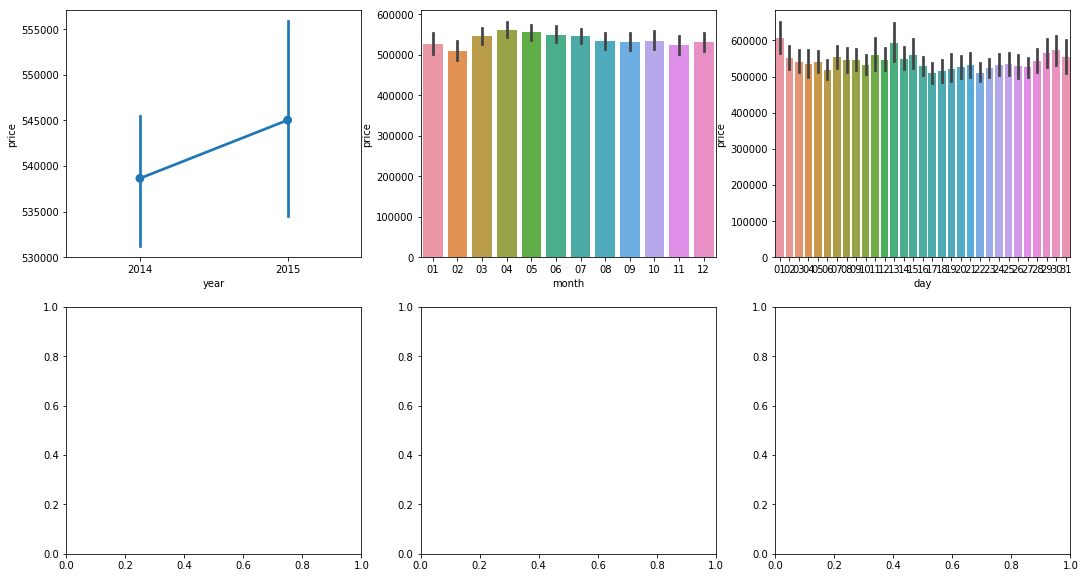

In [8]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,10)

sns.pointplot(data=train, x='year', y='price', ax=ax1)
sns.barplot(data=train, x='month', y='price', ax=ax2)
sns.barplot(data=train, x='day', y='price', ax=ax3)
# sns.barplot(data=train, x='hour', y='count', ax=ax4)
# sns.barplot(data=train, x='minute', y='count', ax=ax5)
# sns.barplot(data=train, x='second', y='count', ax=ax6)

In [9]:
#거리 구하기
from haversine import haversine

dis_amazon = []
dis_mercer = []
is_mercer = []
for i,j in zip(train['lat'],train['long']):    
    distance = haversine((i,j), (47.603230,-122.330280))
    dis_amazon.append(distance)
    distance2 = haversine((i,j), (47.583316,-122.236008))
    dis_mercer.append(distance2)

    if (i > -122.256194) & (i < -122.199663) & (j < 47.594725) & (j > 47.526403):
        is_mercer.append(True)
    else:
        is_mercer.append(False)
    
disa = pd.DataFrame(dis_amazon)
disa2 = pd.DataFrame(dis_mercer)
is_mercer_df = pd.DataFrame(is_mercer)

train['distanceFromAmazon'] = disa
train['distanceFromMercer'] = disa2
train['is_mercer'] = is_mercer_df 

#머서아일랜드 인지 아닌지
train['is_mercer'].unique()

array([False])

In [10]:
#거리 구하기
from haversine import haversine

dis_amazon = []
dis_mercer = []
is_mercer = []
for i,j in zip(test['lat'],test['long']):    
    distance = haversine((i,j), (47.603230,-122.330280))
    dis_amazon.append(distance)
    distance2 = haversine((i,j), (47.583316,-122.236008))
    dis_mercer.append(distance2)

    if (i > -122.256194) & (i < -122.199663) & (j < 47.594725) & (j > 47.526403):
        is_mercer.append(True)
    else:
        is_mercer.append(False)
    
disa = pd.DataFrame(dis_amazon)
disa2 = pd.DataFrame(dis_mercer)
is_mercer_df = pd.DataFrame(is_mercer)

test['distanceFromAmazon'] = disa
test['distanceFromMercer'] = disa2
test['is_mercer'] = is_mercer_df 

#머서아일랜드 인지 아닌지
test['is_mercer'].unique()

array([False])

In [11]:
train['yr_built'].describe()
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'distanceFromAmazon', 'distanceFromMercer', 'is_mercer'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
fields = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year'
        , 'distanceFromAmazon']
scale_fileds = ['bedrooms', 'bathrooms', 'sqft_living',
               'sqft_lot', 'floors','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'
                , 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year'
                , 'distanceFromAmazon' ]


# from sklearn.preprocessing import StandardScaler, Normalizer , MinMaxScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# scale_train = scaler.transform(X_train)
# scale_test = scaler.transform(X_test)
# scale_real_test = scaler.transform(test_data)



x_train, x_test, y_train, y_test = train_test_split(train[fields], train['price'], test_size = 0.15 , random_state=0)

In [13]:
df_pred = pd.DataFrame(train['id'])
df_pred['price'] = train['price']
df_pred.head()

,id,price
0,0,221900.0
1,1,180000.0
2,2,510000.0
3,3,257500.0
4,4,291850.0


In [14]:
from sklearn.model_selection import GridSearchCV


In [15]:
#Linea Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

df_pred['LR_pred'] = pd.DataFrame(lr.predict(x_test))
print(lr.score(x_train,y_train))

0.7266219187581191


In [16]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(max_iter=1000,alpha = 2 ,random_state=42, solver='lsqr').fit(x_train, y_train)
print(ridge.score(x_train,y_train))

0.5142702092909799


In [17]:
#Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha =100).fit(x_train,y_train)
print(lasso.score(x_train,y_train))

0.7265979876048381


In [18]:
#random Forest
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=6, random_state=0,
                             n_estimators=1000)
regr.fit(x_train,y_train)
regr.predict(test[fields])

array([ 556648.85263278,  435697.02156727, 1294735.07189188, ...,
        413842.39497481,  448328.62828929,  444104.76311813])

In [119]:
sub_rf = pd.DataFrame(test['id'])
sub_rf['price'] = pd.DataFrame(regr.predict(test[fields]))
sub_rf.head()
sub_rf.set_index('id', inplace=True)
sub_rf
sub_rf.to_csv('Submit_RF.csv', sep=',', encoding ='utf-8')

In [157]:
#polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_ = poly.fit_transform(x_train)
test_ = poly.transform(test[fields])
# Instantiate
lg = LinearRegression()
# Fitb
lg.fit(x_train_, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
#polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_ = poly.fit_transform(x_train)
test_ = poly.transform(test[fields])
# Instantiate
lg = Lasso(alpha =100, max_iter=2000)
# Fitb
lg.fit(x_train_, y_train)


KeyboardInterrupt: 

In [150]:
test.shape

(6468, 26)

In [153]:
# lg.coef_

In [164]:
# df_pred['PLR_pred'] = pd.DataFrame(lg.predict(x_test))
lg.predict(test_)

array([ 581895.0675482 ,  362485.84569431, 1382435.78565668, ...,
        419833.65475478,  353620.38057428,  430232.53317384])

In [165]:
sub_lg = pd.DataFrame(test['id'])
sub_lg['price'] = pd.DataFrame(lg.predict(test_))
sub_lg.head()
sub_lg.set_index('id', inplace=True)
sub_lg
sub_lg.to_csv('Submit_lg2.csv', sep=',', encoding ='utf-8')

In [75]:
print(lg.score(x_train_,y_train) , lg.score(x_test_,y_test) )

0.928599113669103 -5.469472668009608
